In [1]:
import matplotlib as mpl
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection

import fastf1 as ff1


/home/riccardo/anaconda3/envs/py39_tf211/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [5]:

year = 2021
wknd = 'Silverstone'
ses = 'R'
driver = 'VER'
colormap = mpl.cm.plasma

session = ff1.get_session(year, wknd, ses)
weekend = session.event
session.load()
lap = session.laps.pick_driver(driver).pick_fastest()
circuit_info = session.get_circuit_info()


core           INFO 	Loading data for British Grand Prix - Race [v3.4.1]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No ca

In [6]:

# Get telemetry data
x = lap.telemetry['X']              # values for x-axis
y = lap.telemetry['Y']              # values for y-axis
color = lap.telemetry['Speed']      # value to base color gradient on

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)


core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


In [11]:
segments

array([[[-1791.29937082,  1158.31826887],
        [-1784.10368326,  1168.28051612]],

       [[-1784.10368326,  1168.28051612],
        [-1748.        ,  1218.        ]],

       [[-1748.        ,  1218.        ],
        [-1681.94917903,  1307.69463696]],

       ...,

       [[-1902.70668004,  1006.07163514],
        [-1859.        ,  1066.        ]],

       [[-1859.        ,  1066.        ],
        [-1801.70718794,  1145.06087695]],

       [[-1801.70718794,  1145.06087695],
        [-1790.09895679,  1161.14671412]]])

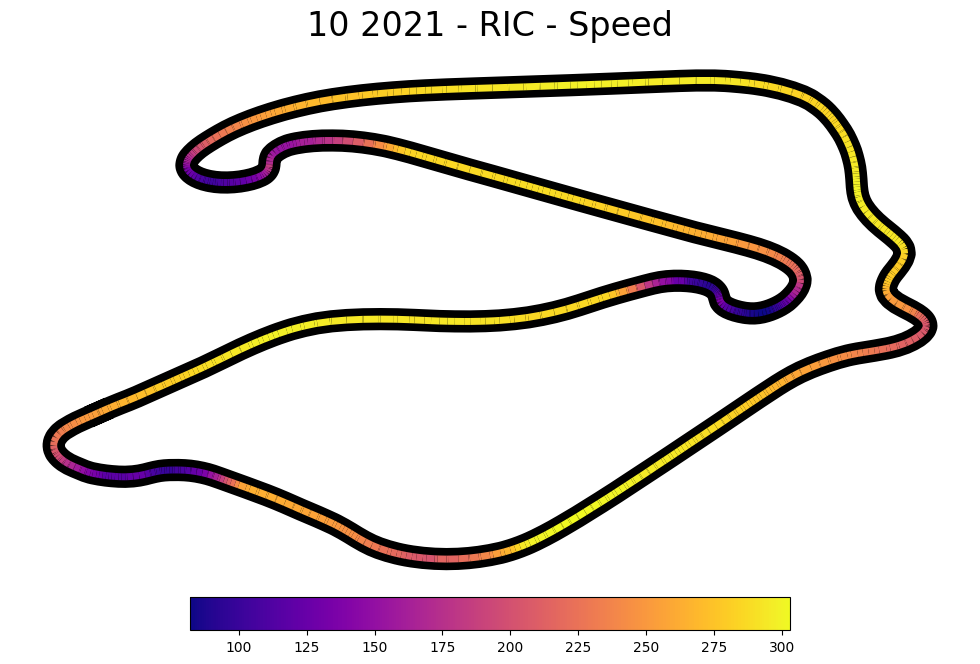

In [7]:

# We create a plot with title and adjust some setting to make it look good.
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(12, 6.75))
fig.suptitle(f'{weekend.name} {year} - {driver} - Speed', size=24, y=0.97)

# Adjust margins and turn of axis
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')


# After this, we plot the data itself.
# Create background track line
ax.plot(lap.telemetry['X'], lap.telemetry['Y'],
        color='black', linestyle='-', linewidth=16, zorder=0)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(color.min(), color.max())
lc = LineCollection(segments, cmap=colormap, norm=norm,
                    linestyle='-', linewidth=5)

# Set the values used for colormapping
lc.set_array(color)

# Merge all line segments together
line = ax.add_collection(lc)


# Finally, we create a color bar as a legend.
cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = mpl.colors.Normalize(vmin=color.min(), vmax=color.max())
legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap,
                                   orientation="horizontal")


# Show the plot
plt.show()

In [25]:
import numpy as np
import pandas as pd
import fastf1 as ff1

# Charger la session pour un circuit spécifique
season_year = 2023
session = ff1.get_session(season_year, 'Silverstone', 'R')
session.load()

# Choisir le tour le plus rapide et récupérer les données de télémétrie
lap = session.laps.pick_fastest()
telemetry = lap.get_telemetry()
circuit_info = session.get_circuit_info()

# Initialiser le DataFrame des virages avec une colonne pour la vitesse moyenne
corner_df = circuit_info.corners[['X', 'Y', 'Number']]
corner_df['Average_Speed'] = None  # Colonne pour la vitesse moyenne

# Fonction pour calculer la vitesse moyenne autour d'un virage
def calculate_average_speed_near_corner(corner_x, corner_y, telemetry):
    # Rayon autour du virage pour calculer la vitesse
    radius = 50  # Ajustez ce rayon si nécessaire
    close_points = telemetry[(np.sqrt((telemetry['X'] - corner_x) ** 2 + 
                                      (telemetry['Y'] - corner_y) ** 2) < radius)]
    return close_points['Speed'].mean() if not close_points.empty else np.nan

# Remplir le DataFrame avec la vitesse moyenne de chaque virage
for i in range(1, len(corner_df)):
    corner_x, corner_y = corner_df.iloc[i]['X'], corner_df.iloc[i]['Y']
    
    # Calculer la vitesse moyenne autour du virage
    avg_speed = calculate_average_speed_near_corner(corner_x, corner_y, telemetry)
    corner_df.at[i, 'Average_Speed'] = avg_speed

# Afficher le DataFrame avec les résultats pour le circuit
print(corner_df)


core           INFO 	Loading data for British Grand Prix - Race [v3.4.1]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!

              X             Y  Number Average_Speed
0   1192.508301   4503.826172       1          None
1   2770.315186   4462.892090       2         289.0
2   4845.322266   5895.130371       3         127.5
3   5802.704102   4733.524414       4     88.333333
4   6232.291016   6458.979492       5         225.0
5    631.385986  10910.232422       6         176.5
6   -566.251648   9540.383789       7         111.0
7    761.338562  12361.558594       8           NaN
8   5893.893555  12947.209961       9         282.0
9   7295.830078   7780.465820      10         292.0
10  7534.993164   6906.171875      11         287.5
11  7336.696289   5474.734863      12         259.0
12  7776.478516   4163.521973      13         215.0
13  6806.810059   3146.688965      14         251.0
14  2398.952148  -4099.241211      15           NaN
15  -620.428711   -993.766174      16         140.0
16 -1438.052612  -1146.763184      17         119.0
17 -2309.334229   -105.719666      18         210.0


/tmp/ipykernel_122655/30128707.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corner_df['Average_Speed'] = None  # Colonne pour la vitesse moyenne
